**A base de dados foi utilizado do seguinte site.**
https://www.kaggle.com/loveall/clicks-conversion-tracking/data

**Detalles y significado de cada Columna**

1.) **ad_id:** un ID único para cada anuncio.

2.) **xyz_campaign_id:** un ID asociado con cada campaña publicitaria de la empresa XYZ.

3.) **fb_campaign_id:** una identificación asociada con la forma en que Facebook rastrea cada campaña.

4.) **age:** edad de la persona a quien se muestra el anuncio.

5.) **gender:** se muestra el género de la persona que desea agregar

6.) **interest:** un código que especifica la categoría a la que pertenece el interés de la persona (los intereses son los mencionados en el perfil público de Facebook de la persona).

7.) **Impressions:** la cantidad de veces que se mostró el anuncio.

8.) **Clicks:** número de clics para ese anuncio.

9.) **spent:** Monto pagado por la empresa xyz a Facebook, para mostrar ese anuncio.

10.) **Total_Conversion:** número total de personas que consultaron sobre el producto después de ver el anuncio.

11.) **Aproved_Conversion:** número total de personas que compraron el producto después de ver el anuncio.


** Algoritmos **

Mínimos quadrados. 

In [0]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

In [75]:
df = pd.read_csv('KAG_conversion_data.csv')
df.head(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


#Cambiando nombre de features



In [76]:
df.ad_id.value_counts().max() #Verificando que cada ID de cada sea único. 

1

In [77]:
df.rename(columns= {'ad_id': 'id_anuncio', 'xyz_campaign_id': 'id_campanha', 'fb_campaign_id':'id_fb_campanha', 'age':'idade', 'gender':'genero', 
                    'intereset':'interesse', 'Impressions':'numero_exibicoes', 'Clicks':'cliques_no_anuncio', 'Spent':'valor_pago_anuncio',
                    'Total_Conversion':'conversao', 'Approved_Conversion':'compras'}, inplace=True)
df.columns

Index(['id_anuncio', 'id_campanha', 'id_fb_campanha', 'idade', 'genero',
       'interest', 'numero_exibicoes', 'cliques_no_anuncio',
       'valor_pago_anuncio', 'conversao', 'compras'],
      dtype='object')

#Verificando datos faltantes o nulos


In [78]:
df.shape 

(1143, 11)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_anuncio          1143 non-null   int64  
 1   id_campanha         1143 non-null   int64  
 2   id_fb_campanha      1143 non-null   int64  
 3   idade               1143 non-null   object 
 4   genero              1143 non-null   object 
 5   interest            1143 non-null   int64  
 6   numero_exibicoes    1143 non-null   int64  
 7   cliques_no_anuncio  1143 non-null   int64  
 8   valor_pago_anuncio  1143 non-null   float64
 9   conversao           1143 non-null   int64  
 10  compras             1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [80]:
df.describe()

,id_anuncio,id_campanha,id_fb_campanha,interest,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [81]:
df.isnull().sum()

id_anuncio            0
id_campanha           0
id_fb_campanha        0
idade                 0
genero                0
interest              0
numero_exibicoes      0
cliques_no_anuncio    0
valor_pago_anuncio    0
conversao             0
compras               0
dtype: int64

In [82]:
df.isna().sum()

id_anuncio            0
id_campanha           0
id_fb_campanha        0
idade                 0
genero                0
interest              0
numero_exibicoes      0
cliques_no_anuncio    0
valor_pago_anuncio    0
conversao             0
compras               0
dtype: int64

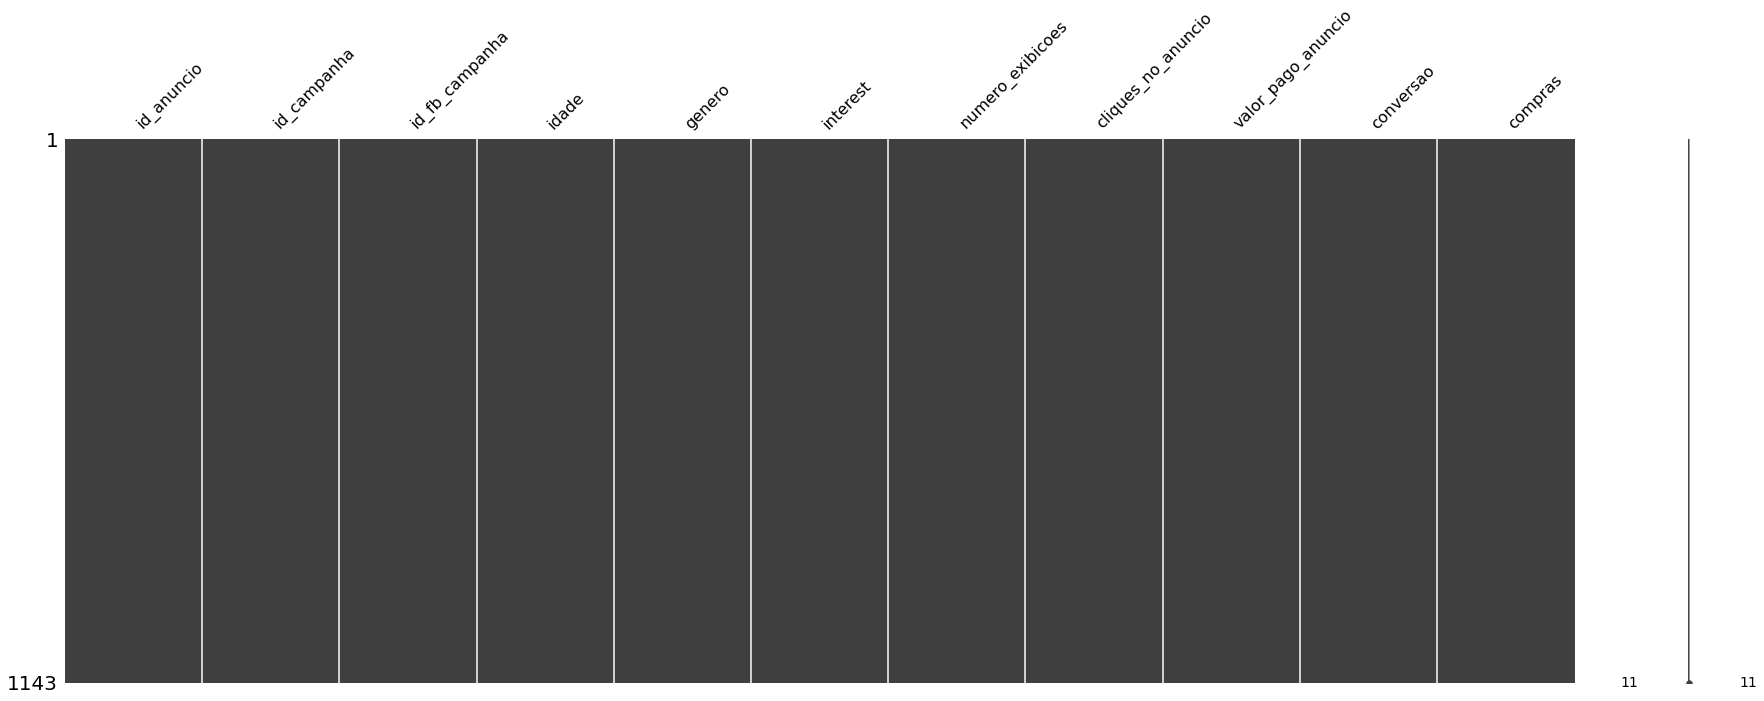

In [83]:
missingno.matrix(df, figsize= (30,10))  #caso tenha dados faltantes vai mostrar

#Analizando datos


In [84]:
df.compras.value_counts()

0     559
1     403
2      86
3      35
4      24
6       7
5       7
8       5
10      4
7       4
9       3
14      2
21      1
17      1
13      1
12      1
Name: compras, dtype: int64

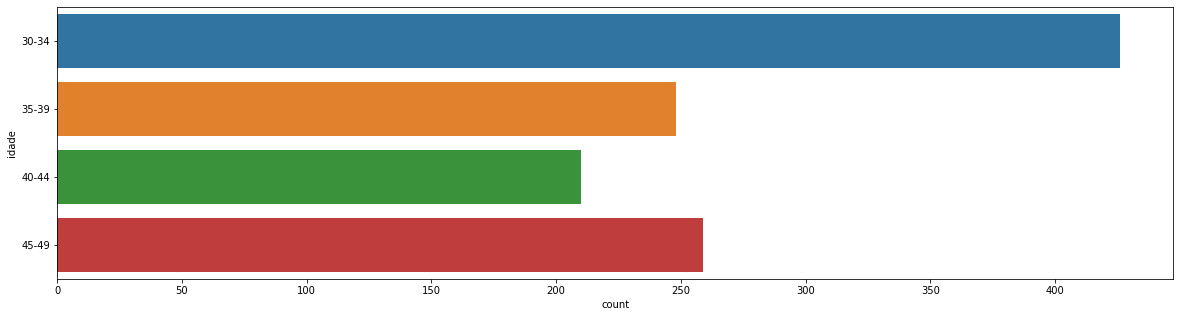

In [85]:
#visualizando quantidade de registros por idade
plt.figure(figsize=(20,5))
sns.countplot(y='idade', data=df)

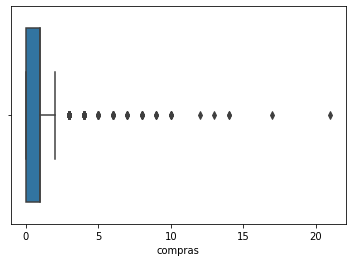

In [86]:
sns.boxplot(df['compras'])
plt.show()

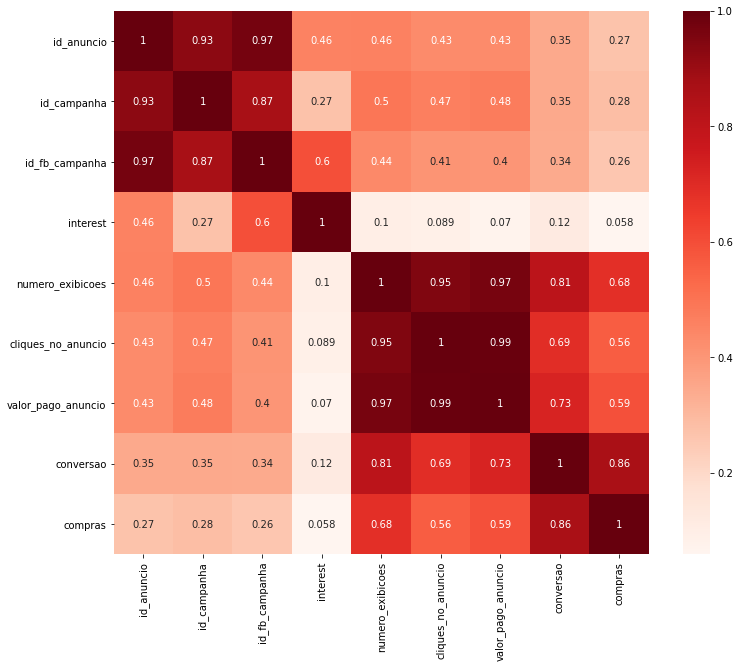

In [87]:
#correlação de Pearson, para verificar features con maio correlação entre as mesmas
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

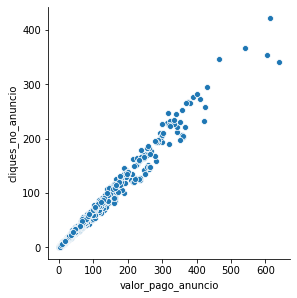

In [88]:
#gráfico de dispersión
sns.pairplot(df, x_vars=['valor_pago_anuncio'], y_vars=['cliques_no_anuncio'], height=4, kind='scatter')
plt.show()

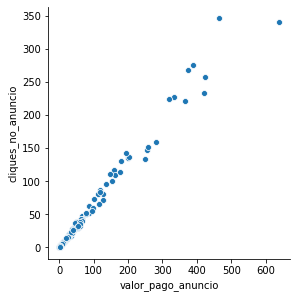

In [89]:
#Mesmo grrafico com uma amostra da df total
amostra= df.sample(n=200)
sns.pairplot(amostra, x_vars=['valor_pago_anuncio'], y_vars=['cliques_no_anuncio'], height=4, kind='scatter')
plt.show()

#Iniciando Modelo

In [0]:
#Separando as variaveis para o algoritmo
X = df['valor_pago_anuncio']
y = df['cliques_no_anuncio']

#separando os dados para treinamento y teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [91]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,valor_pago_anuncio
204,1.0,0.000000
618,1.0,0.000000
1140,1.0,40.289999
478,1.0,0.000000
365,1.0,0.000000


In [92]:
#Entrenamiento del modelo

lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const                -0.149821
valor_pago_anuncio    0.655808
dtype: float64

In [93]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     cliques_no_anuncio   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 5.705e+04
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        03:46:24   Log-Likelihood:                -2529.4
No. Observations:                 765   AIC:                             5063.
Df Residuals:                     763   BIC:                             5072.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1498      0.279     -0.537      0.592      -0.698       0.398
valor_pago_anuncio     0.6558      0.003    238.846      0.000       0.650       0.661
==============================================================================
Omnibus:                      259.451   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4853.186
Skew:                          -1.034   Prob(JB):                         0.00
Kurtosis:                      15.165   Cond. No.                         119.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
# y = a * x + b
y_equacao = 0.6558 * X_train + -0.1498


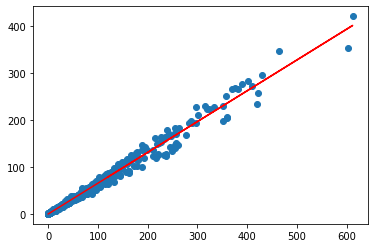

In [96]:
plt.scatter(X_train, y_train) #plotando os dados de treinamento
plt.plot(X_train, y_equacao, 'r') #plotando a reta resultado do modelo 
plt.show()

In [100]:
X_train.head()

204      0.000000
618      0.000000
1140    40.289999
478      0.000000
365      0.000000
Name: valor_pago_anuncio, dtype: float64

In [101]:
y_train.head()

204      0
618      0
1140    28
478      0
365      0
Name: cliques_no_anuncio, dtype: int64

In [110]:
#Tamanho do treino
print(f'Tamanho do treino {len(X_train)}, y corresponde a {(len(X_train)/len(df))*100}')

#Tamanho do treino
print(f'Tamanho do teste {len(X_test)}, y corresponde a {(len(X_test)/len(df))*100}')

#Tamanho do dataframe origina
print(f'Tamanho do teste {len(df)}')



Tamanho do treino 765, y corresponde a 66.92913385826772
Tamanho do teste 378, y corresponde a 33.07086614173229
Tamanho do teste 1143


In [0]:
#Redifiniendo las variables en arrays para que la reggresion linear funcione
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1) 
y_test = np.array(y_test).reshape(-1,1)

In [117]:
#importando y declarando regresao linear
modelo = LinearRegression()

#treinando o modelo
modelo.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Verificando os 2 modelos

In [121]:
print(f'coeficiento do modelo Sklear {modelo.coef_}')
print(f'coeficiento do modelo Sklear {modelo.intercept_}')


coeficiento do modelo Sklear [[0.65580835]]
coeficiento do modelo Sklear [-0.14982085]


In [0]:
# y = a * x + b
y_equacao = 0.6558 * X_train + -0.1498

Podemos ver que o resultado do algoritmos do StatsModels teve o mesmo resultado que o algoritmos do Scikit Learning, tanto no coeficiente como no valor intercept, ou como seja tanto no "a" como no "b"

#Façendo 1º previsão


In [0]:
valor_investimento = 5

In [128]:
modelo.predict([[valor_investimento]])

array([[3.1292209]])

Resultado acima diz que para um investimento de 5 Reais obteremos 3 cliques na nossa campanha de marketing

#Façendo uma previsão de retorno em cliques para um invesitmendo de 1000 R$

In [0]:
valor_investimento = 1000

In [130]:
modelo.predict([[valor_investimento]])

array([[655.65853056]])

Reusltado acima diz que para um investimendo de 1.000,00 R$ obteremos 655 clieques na nossa campanha de marketing